In [1]:
# This is necessary library use during the solving the problem.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # to avoid the warnings during executing the program
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/data analytic -20220106T192432Z-001/data analytic/diabeties.csv")
df

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Perform Exploratory Data Anaylsis needed.**

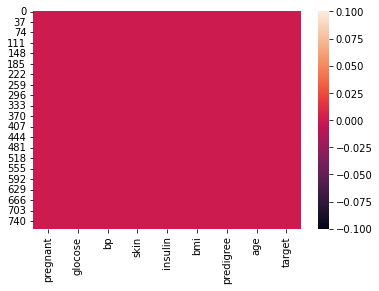

In [3]:
# check the null values.
sns.heatmap(df.isnull())
plt.show()

In [4]:
# Find skewness : use inbuilt method skew() : call inbuilt module 
# To check the skewness value in each and every numerical column 
for col in df:
    print('Skewness of column {} : {}'.format(col,df[col].skew()))

Skewness of column pregnant : 0.9016739791518588
Skewness of column glocose : 0.17375350179188992
Skewness of column bp : -1.8436079833551302
Skewness of column skin : 0.10937249648187608
Skewness of column insulin : 2.272250858431574
Skewness of column bmi : -0.42898158845356543
Skewness of column predigree : 1.919911066307204
Skewness of column age : 1.1295967011444805
Skewness of column target : 0.635016643444986


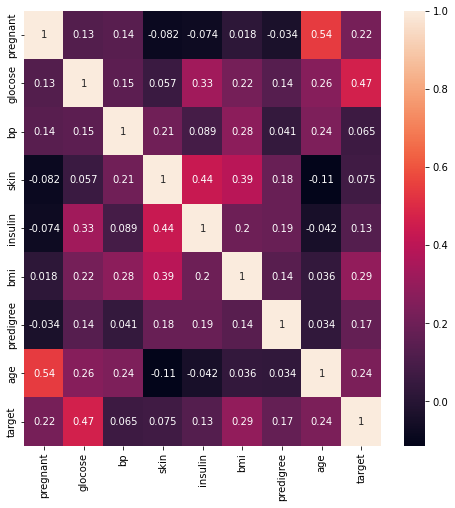

In [5]:
# Find the correlation of dataset.
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [6]:
# apply sqrt() transfromation on normalized losses to reduce the skewness permanently
df['predigree']=np.log(df['predigree'])

In [7]:
df["predigree"].skew()

0.11417768826564408

In [8]:
df["age"]=np.log(df["age"])
df["age"].skew()

0.6017461375371188

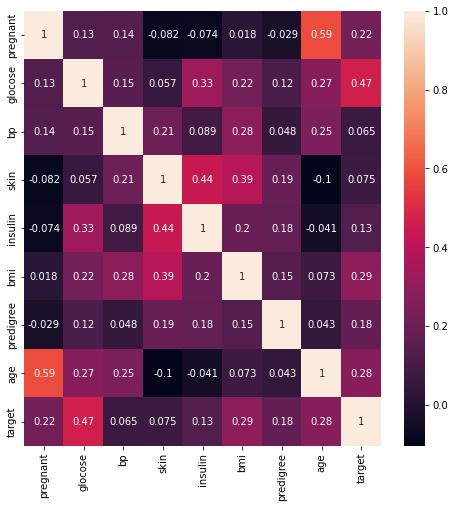

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
# Selecting the input and output variable from dataset
X = df.drop("target",axis=1)  # Select all input features except deposit 
Y = df["target"]  # Select target variable or Output Variable

In [11]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
# Importing the classification_report, confusion matrix class
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
# Create the function
def create_model(model):
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  print("Classification Report: ")
  print(classification_report(Y_test,Y_pred))
  print("Confusion Matrix:")
  print(confusion_matrix(Y_test,Y_pred))
  return model

**Create  Gradient Boosting Classification model**

In [14]:
#call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
# Create the object of GradientBoostingClassifier class
gbc = GradientBoostingClassifier(n_estimators= 75) # not <= 100

In [49]:
gbc = create_model(gbc)

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       146
           1       0.76      0.64      0.69        85

    accuracy                           0.79       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231

Confusion Matrix:
[[129  17]
 [ 31  54]]


**Create  Ada Boosting Classification model**

In [17]:
# ADA Boost
from sklearn.ensemble import AdaBoostClassifier

In [54]:
#Create the object of AdaBoostClassifier class and passing the no. of parameter
#in this class
ada=AdaBoostClassifier(n_estimators=70) # n_estimators can be <=100

In [55]:
ada = create_model(ada)

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.75      0.60      0.67        85

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231

Confusion Matrix:
[[129  17]
 [ 34  51]]


**Create Extreme Gradient Boosting model**

In [20]:
#install the external package from python community first for XGBoost
#!pip install xgboost

In [21]:
from xgboost import XGBClassifier

In [56]:
# Create the object 
xg = XGBClassifier(n_estimators = 50,reg_alpha = 1)
# Automatic overfitting : reg means regularization and alpha or lmabda = pyprtparameter

In [57]:
# call the funciton
xg = create_model(xg)

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       146
           1       0.79      0.67      0.73        85

    accuracy                           0.81       231
   macro avg       0.81      0.78      0.79       231
weighted avg       0.81      0.81      0.81       231

Confusion Matrix:
[[131  15]
 [ 28  57]]
